In [65]:
# import require packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [66]:
# load dataset in notebook
data=pd.read_csv("insurance.csv")

In [67]:
# first five rows of dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
print("Total records of dataset:",data.shape[0])
print("Total faetures of dataset:",data.shape[1])

Total records of dataset: 1338
Total faetures of dataset: 7


In [69]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
# checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [71]:
# unique values in each feature
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'age': array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
        59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
        20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64),
 'sex': array(['female', 'male'], dtype=object),
 'bmi': array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
        29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
        30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
        28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
        28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
        26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
        24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
        31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
        22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
        32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885

<Axes: xlabel='charges', ylabel='Count'>

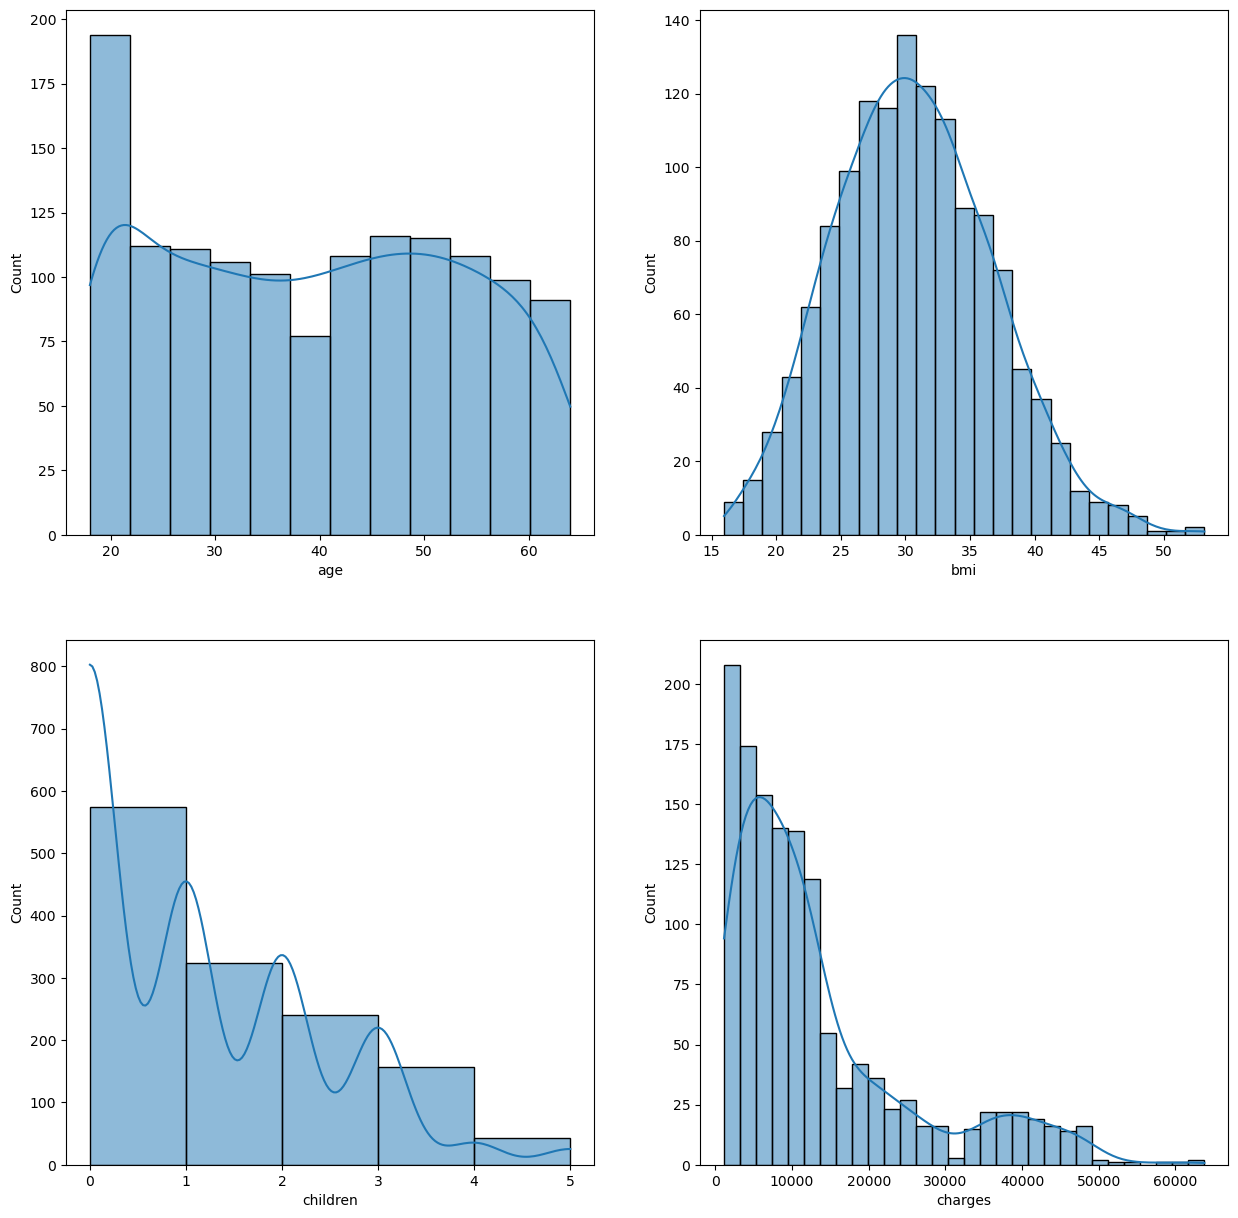

In [72]:
# plotting data distribution of numeric features
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.histplot(data["age"],kde=True)
plt.subplot(2,2,2)
sns.histplot(data["bmi"],kde=True)
plt.subplot(2,2,3)
sns.histplot(data["children"],kde=True,bins=5)
plt.subplot(2,2,4)
sns.histplot(data["charges"],kde=True)


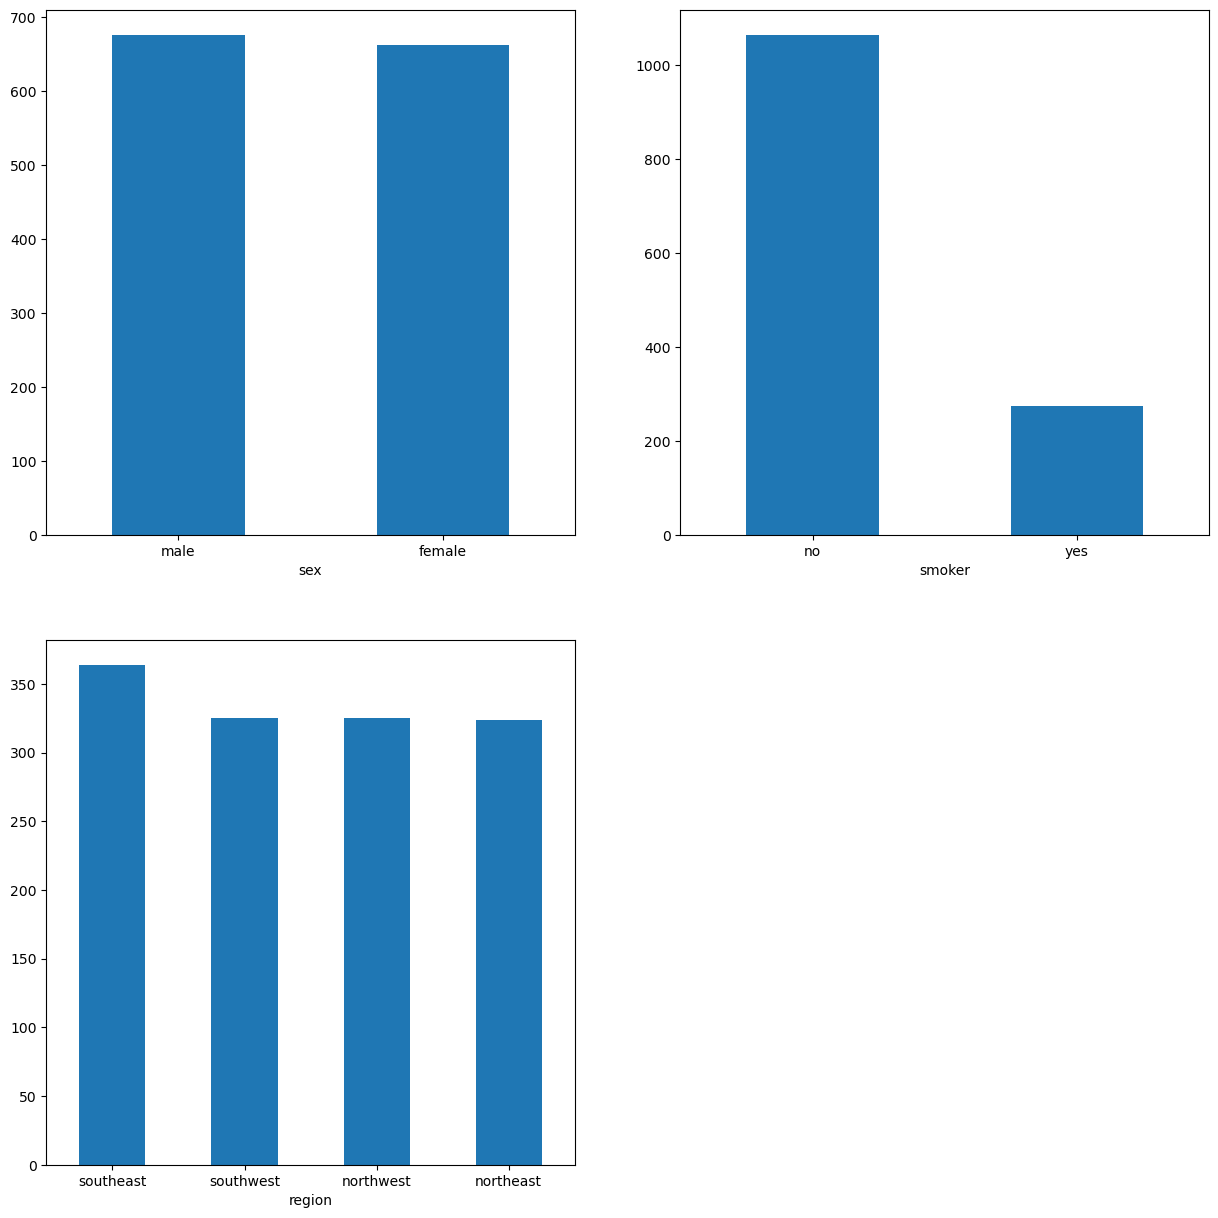

In [73]:
# plotting data count of categorical features
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
data["sex"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,2,2)
data["smoker"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,2,3)
data["region"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

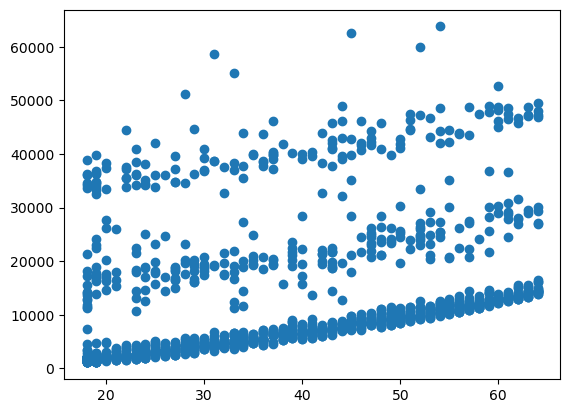

In [74]:
plt.scatter(data["age"],data["charges"])

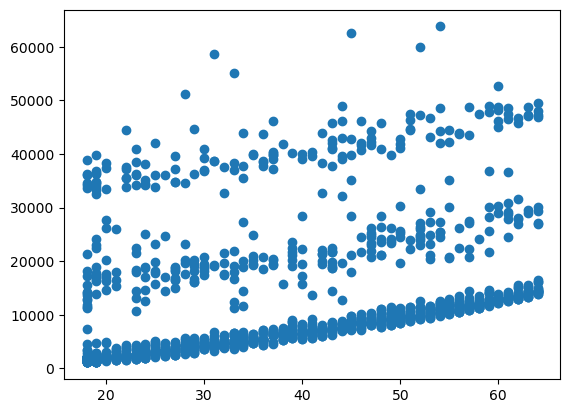

In [75]:
plt.scatter(data["age"],data["charges"])

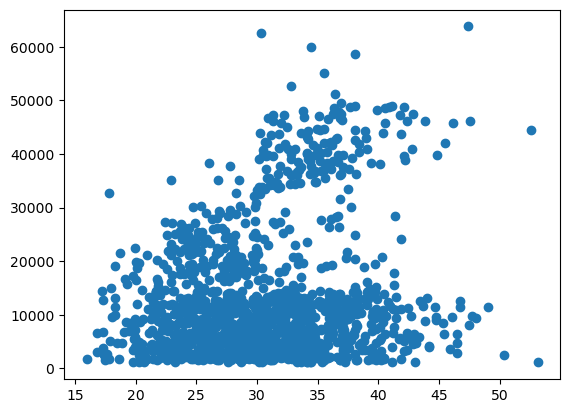

In [76]:
plt.scatter(data["bmi"],data["charges"])

In [77]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

data[["sex","smoker"]]=data[["sex","smoker"]].apply(encode.fit_transform)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [78]:
from sklearn.preprocessing import OneHotEncoder
ohe_encode=OneHotEncoder(sparse_output=False)

encode_data=pd.DataFrame(ohe_encode.fit_transform(data[["region"]]),columns=ohe_encode.get_feature_names_out())
data=pd.concat([data.drop(["region"],axis=1),encode_data],axis=1)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


<Axes: >

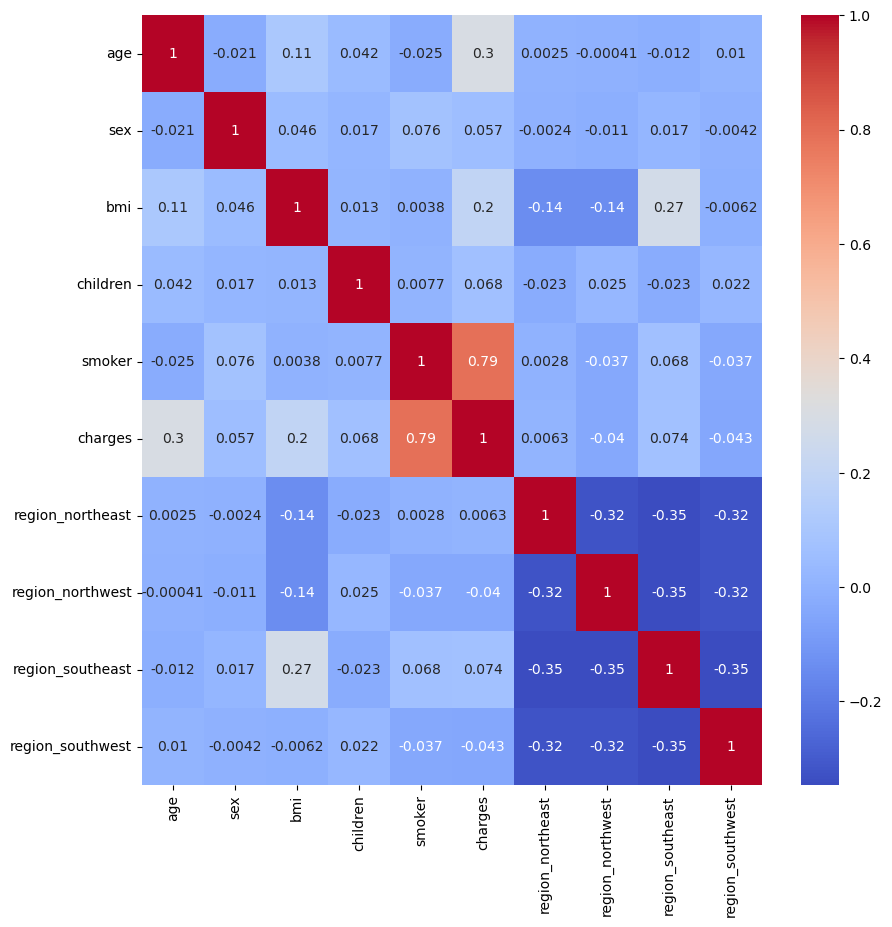

In [79]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [80]:
data.skew().sort_values()

sex                -0.020951
age                 0.055673
bmi                 0.284047
children            0.938380
region_southeast    1.025621
region_southwest    1.200409
region_northwest    1.200409
region_northeast    1.205161
smoker              1.464766
charges             1.515880
dtype: float64

In [81]:
x=data.drop(["charges"],axis=1)
y=data["charges"]

In [82]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(train_x)
scale_train_x=scale.transform(train_x)
scale_test_x=scale.transform(test_x)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [86]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [87]:
def adjusted_r2_score(actual,predicted,data):
    r2=r2_score(actual,predicted)
    k=data.shape[1]
    n=data.shape[0]

    return 1-(1-r2)*(n-1)/(n-k-1)


In [88]:
def get_metrics(actual,predicted,data):
    r2=r2_score(actual,predicted)
    adjusted_r2=adjusted_r2_score(actual,predicted,data)
    mse=mean_squared_error(actual,predicted)
    mae=mean_absolute_error(actual,predicted)
    rmse=root_mean_squared_error(actual,predicted)
    return r2,adjusted_r2,mse,mae,rmse
    

In [89]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "XGBRegressor":XGBRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "svm":SVR()
}


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(scale_train_x,train_y)

    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)

    train_r2,train_adj_r2,train_mse,train_mae,train_rmse=get_metrics(train_y,train_pred,train_x)
    test_r2,test_adj_r2,test_mse,test_mae,test_rmse=get_metrics(test_y,test_pred,test_x)


    print(list(models.keys())[i])
    print("-----------------------------------")
    print("Training data:")
    print("-----------------------------------")
    print("r2_score:",train_r2)
    print("adjusted_r2_score:",train_adj_r2)
    print("mean squared error:",train_mse)
    print("mean absolute error:",train_mae)
    print("root mean squared error:",train_rmse)
    print("Testing data:")
    print("-----------------------------------")
    print("r2_score:",test_r2)
    print("adjusted_r2_score:",test_adj_r2)
    print("mean squared error:",test_mse)
    print("mean absolute error:",test_mae)
    print("root mean squared error:",test_rmse)
    print("====================================================================")
    print("\n")

    

LinearRegression
-----------------------------------
Training data:
-----------------------------------
r2_score: 0.7417255854683333
adjusted_r2_score: 0.7395326894958947
mean squared error: 37277681.70201867
mean absolute error: 4208.234572492226
root mean squared error: 6105.545160099848
Testing data:
-----------------------------------
r2_score: 0.7835929767120722
adjusted_r2_score: 0.7760438945043537
mean squared error: 33596915.85136149
mean absolute error: 4181.194473753654
root mean squared error: 5796.284659276275


Ridge
-----------------------------------
Training data:
-----------------------------------
r2_score: 0.7417249066344849
adjusted_r2_score: 0.7395320048983626
mean squared error: 37277779.68056671
mean absolute error: 4209.394813405179
root mean squared error: 6105.553183829186
Testing data:
-----------------------------------
r2_score: 0.7835437156081317
adjusted_r2_score: 0.7759929149898108
mean squared error: 33604563.57526011
mean absolute error: 4182.753384895

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [101]:
cv=KFold()
gb=GradientBoostingRegressor()

n_estimators_gb=[int(x) for x in np.linspace(start=80,stop=100,num=5)]
max_depth_gb=[int(x) for x in np.linspace(start=3,stop=30,num=2)]
min_samples_split_gb=[2,3,5]
min_samples_leaf_gb=[1,2,3,4]
learning_rate_gb=[0.1,0.01,0.02]

gb_params=dict(n_estimators=n_estimators_gb,max_depth=max_depth_gb,min_samples_split=min_samples_split_gb,min_samples_leaf=min_samples_leaf_gb,learning_rate=learning_rate_gb)

gb_tun=GridSearchCV(estimator=gb,param_grid=gb_params,scoring="accuracy",n_jobs=-1,cv=cv,verbose=3)

gb_tun.fit(scale_train_x,train_y)

gb_train_pred=gb_tun.predict(scale_train_x)
gb_test_pred=gb_tun.predict(scale_test_x)

train_r2,train_adj_r2,train_mse,train_mae,train_rmse=get_metrics(train_y,gb_train_pred,train_x)
test_r2,test_adj_r2,test_mse,test_mae,test_rmse=get_metrics(test_y,gb_test_pred,test_x)



print("GradientBoostingRegressor Hyperparameter tuning")
print("-----------------------------------")
print("Training data:")
print("-----------------------------------")
print("r2_score:",train_r2)
print("adjusted_r2_score:",train_adj_r2)
print("mean squared error:",train_mse)
print("mean absolute error:",train_mae)
print("root mean squared error:",train_rmse)
print("Testing data:")
print("-----------------------------------")
print("r2_score:",test_r2)
print("adjusted_r2_score:",test_adj_r2)
print("mean squared error:",test_mse)
print("mean absolute error:",test_mae)
print("root mean squared error:",test_rmse)
print("====================================================================")
print("\n")

gb_tun.best_params_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
GradientBoostingRegressor Hyperparameter tuning
-----------------------------------
Training data:
-----------------------------------
r2_score: 0.8946298762042278
adjusted_r2_score: 0.8937352242097354
mean squared error: 15208451.610987958
mean absolute error: 2153.9962966402923
root mean squared error: 3899.8014835357912
Testing data:
-----------------------------------
r2_score: 0.8796232021708638
adjusted_r2_score: 0.8754240115489171
mean squared error: 18688345.16401507
mean absolute error: 2407.3474709793877
root mean squared error: 4323.001869536384




{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [111]:
act_pred=pd.DataFrame({"actual":test_y,"predicted":gb_test_pred}).reset_index(drop=True)
act_pred.head()

,actual,predicted
0,9095.06825,10908.951661
1,5272.17580,5782.945912
2,29330.98315,27722.560126
3,9301.89355,9755.014581
4,33750.29180,33977.608340


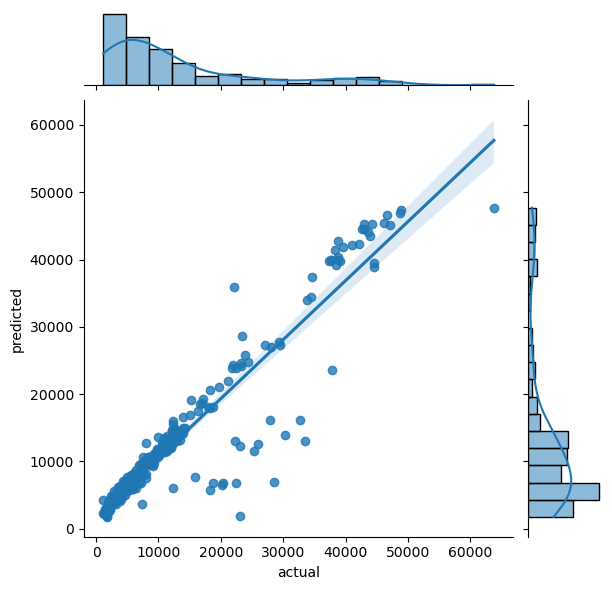

In [112]:
sns.jointplot(data=act_pred,x=act_pred["actual"],y=act_pred["predicted"],kind="reg")